<a href="https://colab.research.google.com/github/ipaliotti/MLPNS_IPaliotti/blob/main/convolutionNT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras


In [ ]:
plt.rcParams["figure.figsize"] = [ 10 , 8 ]
plt.rcParams["image.interpolation"]="nearest"
plt.rcParams["image.cmap"]="gist_gray"

In [11]:
cd /content/drive/MyDrive/MLPN2023

/content/drive/MyDrive/MLPN2023


In [12]:
ls #guarda cosa c'è dentro


kaggleTitanic/  spm-20210427T111354Z-001.zip


In [13]:
!unzip spm-20210427T111354Z-001.zip

Archive:  spm-20210427T111354Z-001.zip
  inflating: spm/spm_struct_pos.npy  
  inflating: spm/spm_struct_neg.npy  
  inflating: spm/test_good_all.npy   
  inflating: spm/train_good_all.npy  
  inflating: spm/test_bad_all.npy    
  inflating: spm/train_bad_all.npy   


In [16]:
data = np.load("spm/train_good_all.npy")

In [17]:
data.shape


(1302, 64, 64)

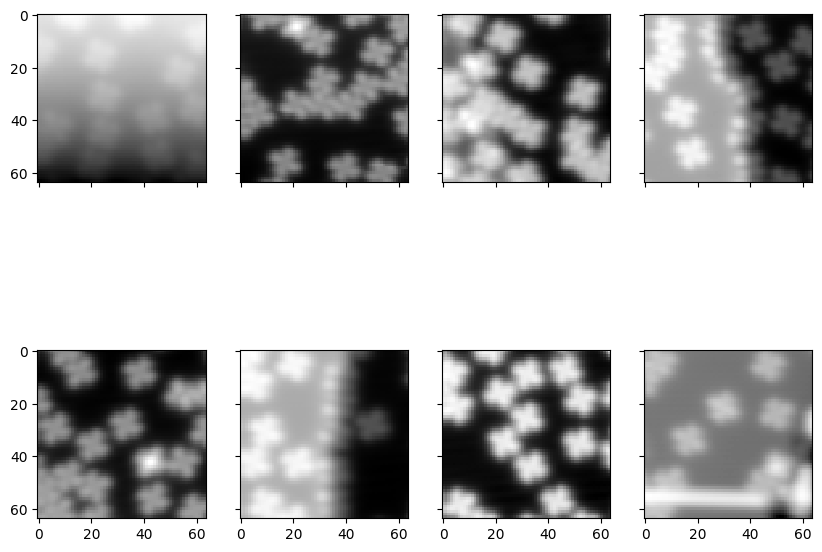

In [19]:
fig, ax = plt.subplots(2,4,sharex=True, sharey=True)

for ii in range(8):
   ax[ii // 4, ii % 4].imshow(data[ii])

(array([ 254226.,  957465., 1143646., 1050540.,  825288.,  338534.,
         391059.,  151471.,  179803.,   40960.]),
 array([-1.07775726e-07, -9.55749615e-08, -8.33741970e-08, -7.11734324e-08,
        -5.89726678e-08, -4.67719032e-08, -3.45711387e-08, -2.23703741e-08,
        -1.01696095e-08,  2.03115507e-09,  1.42319196e-08]),
 <BarContainer object of 10 artists>)

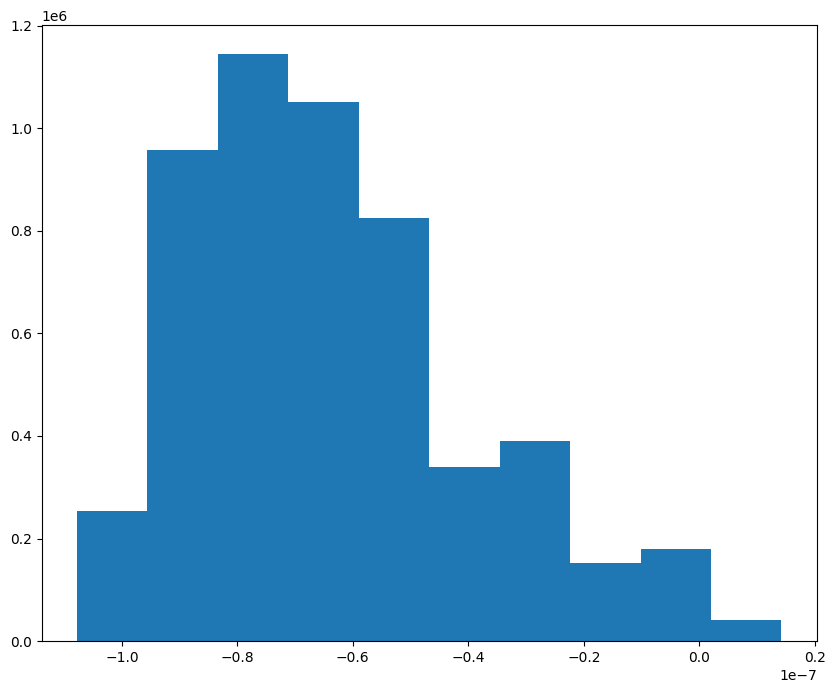

In [20]:
plt.hist(data.flatten())

In [22]:
#norm = ( D - MIN(D)) / RANGE(D)
norm = (data - data.min(axis=(1, 2), keepdims=True)) / (data.max(axis=(1, 2), keepdims=True) - 
                                                        data.min(axis=(1, 2), keepdims=True))


In [23]:
norm.shape

(1302, 64, 64)

In [24]:
norm.min(), norm.max()

(0.0, 1.0)

In [26]:
pos=np.load("spm/spm_struct_pos.npy")
neg=np.load("spm/spm_struct_neg.npy")

In [27]:
pos.shape , neg.shape

((500, 3), (500, 3))

In [28]:
pos[0]

array([30, 25, 51])

In [29]:
pos.max(axis=0)

array([  62,   62, 1300])

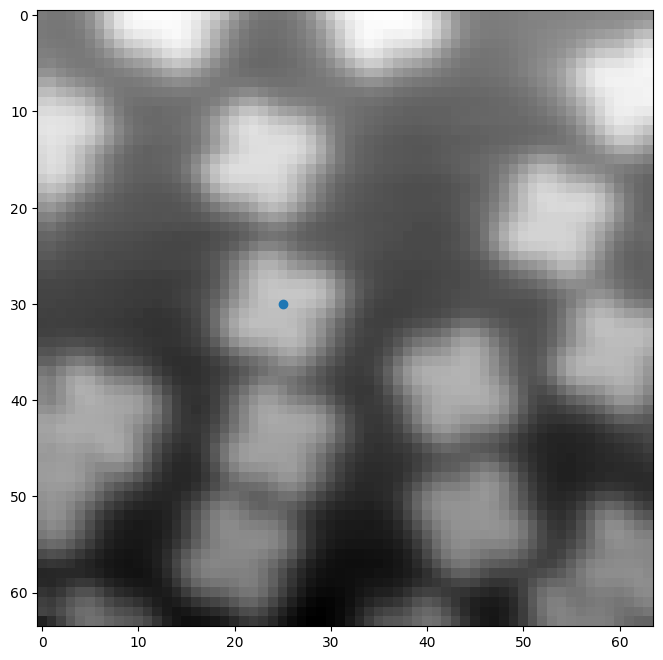

In [30]:
plt.imshow(norm[pos[0][2]])
plt.plot(pos[0][1], pos[0][0], 'o')

In [38]:
wid = 10
stmp_pos = []
for ii in range(pos.shape[0]):
  trow, tcol, tind = pos[ii]
  if (trow > wid) & (trow < 64 - wid) & (tcol > wid) & (tcol < 64 - wid):
    stmp_pos.append(norm[tind, trow-wid:trow+wid, tcol-wid:tcol+wid,])

stmp_pos = np.array(stmp_pos)


In [42]:
wid = 10
stmp_neg = []
for ii in range(neg.shape[0]):
  trow, tcol, tind = neg[ii]
  if (trow > wid) & (trow < 64 - wid) & (tcol > wid) & (tcol < 64 - wid):
    stmp_neg.append(norm[tind, trow-wid:trow+wid, tcol-wid:tcol+wid,])

stmp_neg = np.array(stmp_neg)


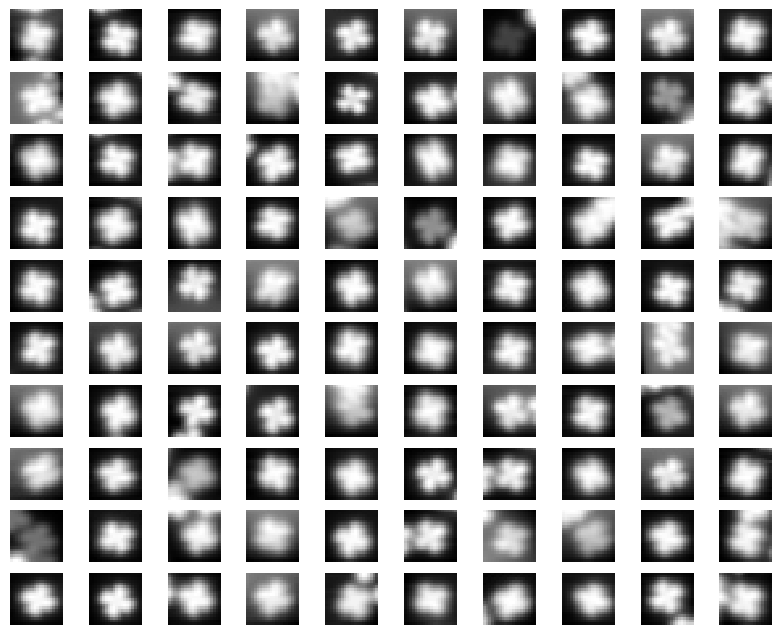

In [43]:
# plot  positive examples
fig, ax = plt.subplots(10, 10)
for ii in range(100):
    ax[ii // 10, ii % 10].imshow(stmp_pos[ii])
    ax[ii // 10, ii % 10].axis("off")

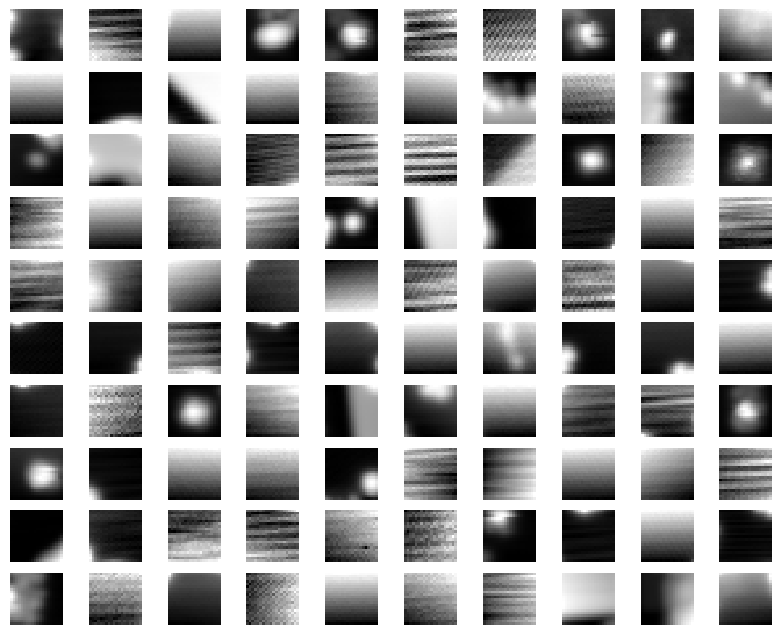

In [44]:
# plot  negative examples
fig, ax = plt.subplots(10, 10)
for ii in range(100):
    ax[ii // 10, ii % 10].imshow(stmp_neg[ii])
    ax[ii // 10, ii % 10].axis("off")

In [45]:
feat = np.concatenate((stmp_neg, stmp_pos), axis=0)
targ = np.concatenate((np.zeros(stmp_neg.shape[0]), 
                      np.ones(stmp_pos.shape[0])))

In [60]:
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, random_state=302, shuffle=True)
feat_tr.shape

(655, 20, 20)

In [61]:
feat_tr=np.expand_dims(feat_tr, axis=3)
feat_te=np.expand_dims(feat_te, axis=3)

In [ ]:
#create a NN

#ORA CREIAMO LA NEURAL NETWORK

In [49]:
layer1 = keras.layers.Conv2D(16, kernel_size=(5, 5), padding="same", 
                             activation="relu", 
                             input_shape=(2 * wid, 2 * wid, 1), #needed in the first layer only
                             kernel_regularizer=keras.regularizers.l2(0.001))

layer2 = keras.layers.MaxPool2D(2)
layer3 = keras.layers.Conv2D(32, kernel_size=(5, 5), padding="same", 
                             activation="relu", 
                             kernel_regularizer=keras.regularizers.l2(0.001))
layer4 = keras.layers.MaxPool2D(2)
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(64, activation="relu",
                            kernel_regularizer=keras.regularizers.l2(0.001))
layer7 = keras.layers.Dense(2, activation="softmax")

layers = [layer1, layer2, layer3, layer4, layer5, layer6, layer7]
model = keras.Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

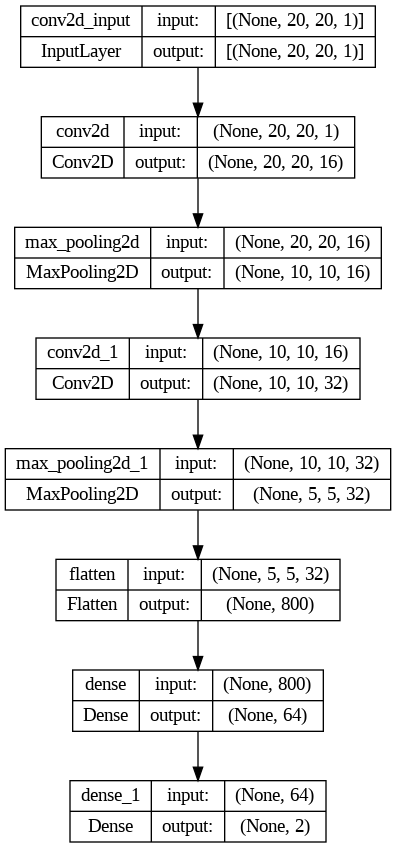

In [50]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)


In [55]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

In [62]:
history = model.fit(feat_tr, targ_tr, epochs=50,
                    batch_size=50, validation_split=0.1)

Epoch 1/50
12/12 [==============================] - 11s 60ms/step - loss: 0.7211 - accuracy: 0.7199 - val_loss: 0.5648 - val_accuracy: 0.9091
Epoch 2/50
12/12 [==============================] - 0s 12ms/step - loss: 0.5414 - accuracy: 0.9083 - val_loss: 0.4480 - val_accuracy: 0.8182
Epoch 3/50
12/12 [==============================] - 0s 10ms/step - loss: 0.4148 - accuracy: 0.8879 - val_loss: 0.3550 - val_accuracy: 0.9242
Epoch 4/50
12/12 [==============================] - 0s 11ms/step - loss: 0.3377 - accuracy: 0.9032 - val_loss: 0.3253 - val_accuracy: 0.8788
Epoch 5/50
12/12 [==============================] - 0s 8ms/step - loss: 0.2944 - accuracy: 0.9304 - val_loss: 0.2824 - val_accuracy: 0.8939
Epoch 6/50
12/12 [==============================] - 0s 7ms/step - loss: 0.2670 - accuracy: 0.9321 - val_loss: 0.2677 - val_accuracy: 0.9091
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.2503 - accuracy: 0.9406 - val_loss: 0.2775 - val_accuracy: 0.9242
Epoch 8/50
12/1

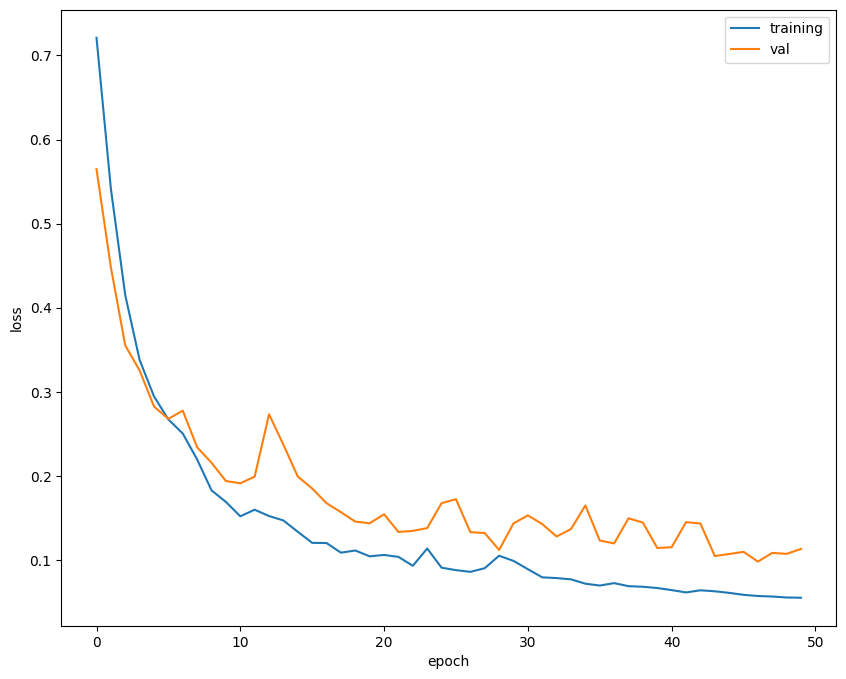

In [63]:
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();